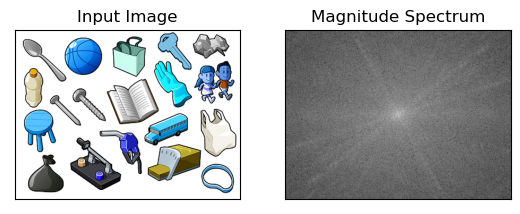

44.13803398843623
No Blur


In [7]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
img = cv2.imread(r'C:\Users\Lenovo\Downloads\objek.jpg') 
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

#fourier transform 
(h,w) = image.shape 
(cX, cY) = (int(w/2.0), int(h/2.0)) 
fft = np.fft.fft2(image) 
fftShift = np.fft.fftshift(fft) 
magnitude = 20 * np.log(np.abs(fftShift)) 

#pLot image 
plt.subplot(121),plt.imshow(img, cmap = 'gray') 
plt.title('Input Image'), plt.xticks([]), plt.yticks([]) 
plt.subplot(122),plt.imshow(magnitude, cmap = 'gray') 
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([]) 
plt.show() 

#detect bLur 
size=60 
fftShift[cY - size:cY + size, cX - size:cX + size] = 0 
fftShift = np.fft.ifftshift(fftShift) 
recon = np.fft.ifft2(fftShift) 
magnitude_recon = 20 * np.log(np.abs(recon))
mean = np.mean(magnitude_recon) 
print(mean) 

thres=10 
if (mean<=thres):
    print("Blur Image") 
else:
    print("No Blur") 
